# Evolutionary History of Felidae

## Introduction
Felidae is a taxonomic family of cats. Members of Felidae range from the domestic cat to extant big cats, such as lions and tigers, but also extinct members such as the saber-toothed tiger. This project aims to analyze the diversity of Felidae through time. The data utilized in this project is found on the PaleoBiology Database online at paleodb.org. Occurrence data of fossils is downloadable as a CSV file with species name, and an estimate for the age of each fossil in the collection. In order to find species diversity through time, the files are cleaned up with UNIX, then run through python functions to get the data into a plottable format, and finally visualized using R. R is used to plot species diversity through time. Since the fossil ages are estimates, we can use PyRate to statistically analyze more accurate estimates for speciation and extinction. Throughout the history of Felidae, some interesting events include the introduction of melanism, present in many species of cats; the Late Miocene Radiation, which is responsible for the great species diversity we see today; and divergenece between modern cats and now extinct saber-toothed cats, such as the smilodon. Diversity graphs will illustrate these events. In addition to occurrence data, the paleobiology database also houses collection data with information on the locations of the fossils as well as their ages. This information can be used to plot the fossil through time, showing the geographic distribution of Felidae through history.

## References
Christiansen, Per. "Evolution of Skull and Mandible Shape in Cats (Carnivora: Felidae)." PLOS (2008): n. pag. PLOS. Web. <http://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0002807&type=printable>. 

Johnson, Warren E., William J. Murphy, Agostinho Antunes, Emma Teeling, Stephen J. O’Brien, Jill Pecon-Slattery, and Eduardo Eizirik. "The Late Miocene Radiat Ion of Modern Felidae : A Genetic Assessment." Science (2006): n. pag. Web. <http://www.imaginiquebengals.com/johnsonsuppl2006.pdf>. 

Eizirik, Eduardo, Eduardo Eizirik, 1,2, * Naoya Yuhki, Warren E. Johnson, Marilyn Menotti-Raymond, Steven S. Hannah, and Stephen J. O’Brien. "Molecular Genetics and Evolution of Melanism in the Cat Family." Current Biology (2003): n. pag. Cell. Web. <http://www.cell.com/current-biology/pdf/S0960-9822(03)00128-3.pdf>.

## Functions in python

### get_column_names()

**file must be a formatted csv file with the head removed and any "\r" characters replaced with newlines**

for this particular file, "felidae_occ.csv", I used the following Unix command

tail -n +18 felidae_occ.csv > formatted_felidae_occ.csv

This function takes in a file and returns the names of all its columns with appropriate indeces

In [3]:
def get_column_names(filename):
    in_file = open(filename) #opens the inputted file
    column_names = {} #create an empty dictionary to populate with the column number as the key and the name of the column as the value
    first_line = in_file.readline() #read in the first line, with only the column names
    column_name_keys = first_line.split('","') #take the column names and split them by '","' to create a list
    num_columns = len(column_name_keys) #get the total number of columns
    for column in range(0, num_columns): #make a for loop that iterates from zero to the num_columns
        column_names[column] = column_name_keys[column]
    in_file.close()
    return column_names


get_column_names("formatted_felidae_occ.csv")

{0: '"occurrence_no',
 1: 'record_type',
 2: 'reid_no',
 3: 'flags',
 4: 'collection_no',
 5: 'identified_name',
 6: 'identified_rank',
 7: 'identified_no',
 8: 'difference',
 9: 'accepted_name',
 10: 'accepted_rank',
 11: 'accepted_no',
 12: 'early_interval',
 13: 'late_interval',
 14: 'max_ma',
 15: 'min_ma',
 16: 'reference_no"\n'}

### column_extractor()

**file must be a formatted csv file with the head removed and any "\r" characters replaced with newlines**

for this particular file, "panthera_col.csv", I used the following Unix command

tail -n +18 panthera_col.csv > formatted_panthera_col.csv


This function will take any two columns and group them together in a dictionary. The keys can be used to identify and match up different values that can be plotted against each other


In [4]:
def column_extractor(file_name, key_column, value_column):
    file_input = open(file_name) #opens the inputted file
    file_input.readline()
    extract_dict = {} #empty dictionary
    for line in file_input:
        y = line.split('","')[key_column] #key column is the y value
        x = line.split('","')[value_column] #value column is the x value
        extract_dict[y] = x #populate dictionary
    file_input.close() 
    return extract_dict




#see section: "Graphing by fossil age" for demonstration of this function

### stratify()
**Must supply a dictionary of items "to stratify" and a "dictionary" to stratify over**

**Both dictionaries must have matching keys**

To supply dictionary items to stratify over (species, time interval, etc.) *For this particular example, I have used time interval in which a fossil shows up as the dictionary to stratify over from the file "formatted_panthera_col.csv"*

This function takes two dictionaries with matching keys as arguments. The first one, "to_stratify" provides as its values all the possible items to stratify over. The other dictionary "dictionary"'s values are stratified over the unique list created from to_stratify. The function returns a list of the values from "dictionary" as dictionaries separated by the to_stratify values. The matching keys are used to match up the values from two different dictionaries.


In [5]:
def stratify(to_stratify, dictionary):   
    stratify_list = list(to_stratify.values())
    stratify = [] #empty list to hold unique values of items to stratify over
    list_of_dicts = [] #empty list to hold stratified dictionaries
    #for loop to create unique list of items to stratify over
    for item in stratify_list:
        if item not in stratify:
            stratify.append(item)
    #for loop to create a dictionary per item in stratify
    for item in stratify:
        new_dict = {}
        #iterate through all items to stratify them into different dictionaries
        for key in to_stratify.keys():
            if to_stratify[key] == item:
                new_dict[key] = dictionary[key] #populate new_dict only if correct dictionary
        list_of_dicts.append(new_dict) #add each item that satisfies the category to the new dictionary
    return list_of_dicts





#see section: "Graphing by fossil age" for demonstration of this function

### map_plotter
**Must supply two dictionaries with matching keys**

The function takes in two dictionaries with matching keys and plots both dictionaries' values as a scatterplot on top of a map, and returns it

In [6]:
def map_plotter(x_dict, y_dict):
    lattitude = [] #empty list for lattitudes
    longitude = [] #empty list for longitudes
    
    #extract the values from x_dict into a list so it is plottable
    x_list = list(x_dict.keys()) #make a list of all the keys
    for item in x_list:
        longitude.append(float(x_dict[item])) #make sure value is a float
    
    #do the same for lattitude
    y_list = list(y_dict.keys()) 
    for item in y_list:
        lattitude.append(float(y_dict[item]))
    
    import matplotlib.pyplot as plt
    import numpy as np
    from mpl_toolkits.basemap import Basemap
    #plot and return
    plt.figure(figsize = (20,10))
    map = Basemap()
    map.drawcoastlines()
    x,y = map(longitude, lattitude)
    map.scatter(x,y,marker="D", color="r")
    return plt.show()




#see section: "Graphing by fossil age" for demonstration of this function

### extract_fossil_ages()
**Must supply filename of csv file downloaded from paleodb.org, and must be formatted with the header removed using tail function in UNIX**

This function takes in a filename and outputs a dictionary with the each species in the collection as a key and a list of the average fossil age of each occurence belonging to the species as a value 

In [7]:
def extract_fossil_ages(filename):
    from collections import defaultdict
    species_ranges = defaultdict(list) #values of the dictionary is a list
    genera = open(filename) #input file
    genera.readline() #read out first line
    genera_dict= {} #create empty dict to return
    for line in genera: #iterating through one line at a time
        species = line.split('","')[5] #species is sixth item
        min_ma = float(line.split('","')[15]) #minimum estimate of age
        max_ma = float(line.split('","')[14]) #maximum estimate of age
        avg_ma = (max_ma + min_ma )/ 2 #find average estimate of age
        genus = species.split(" ")[0] #genus is first word of species name
        if species != genus: #filters out the genus only entries
            species_ranges[species].append(avg_ma) #populate dictionary
    genera.close()
    return species_ranges



#see section: "Output to R: Fossil Occurrences" for demonstration of this function

### dict_to_file()
**Must supply dictionary produced via extract_fossil_ages()**

This function takes in a dictionary created through the previous function, extract_fossil_ages() and a new filename and returns a file with that filename. The file will take the dictionary supplied and for each species find the maximum and minimum of the list of average ages that are the values to the dictionary. 

In [8]:
def dict_to_file(species_ranges_dict, new_filename):
    output_file = open(new_filename, "w") #output file created
    alphabetical = sorted(list(species_ranges_dict.keys())) #dictionary may not be sorted
    for key in alphabetical: #iterating through sorted keys
        species = key #key is species name
        
        ages = species_ranges_dict[key] #take value, which is a list
        minage = min(ages) #min average fossil age
        maxage = max(ages) #max average fossil age
        genus = key.split(" ")[0] #first world of species name is genus
        output_file.write(genus + "," + species + "," + str(minage) + "," + str(maxage) + "\n") #write to output file
    
    output_file.close()
    return output_file



#see section: "Output to R: Fossil Occurrences" for demonstration of this function

## Graphing by fossil age

/home/eeb177-student/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/eeb177-student/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


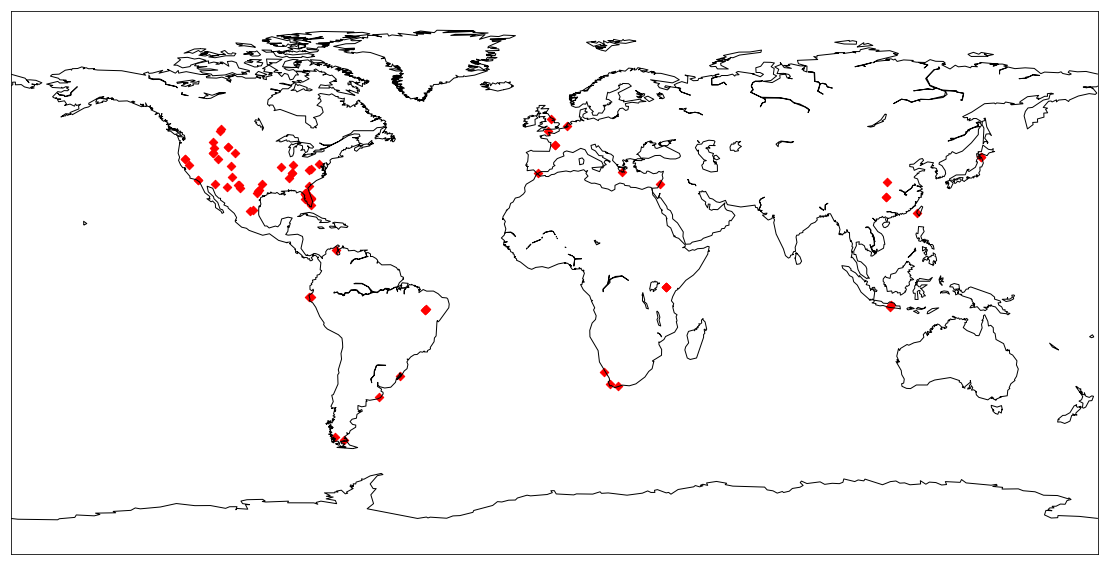

In [9]:
min_ma = column_extractor("formatted_felidae_col.csv", 0, 11) #extract lower bound of fossil age
max_ma = column_extractor("formatted_felidae_col.csv", 0, 12) #extract upper bound of fossil age
#iterate through data, find average fossil age, add it to a new dictionary with average fossil age for each fossil
avg_ma = {}
for key in min_ma.keys():
    avg = ( float(max_ma[key]) + float(min_ma[key]) ) / 2
    avg_ma[key] = avg
    
longitude = column_extractor("formatted_felidae_col.csv", 0, 3) #extract longitude column
latitude = column_extractor("formatted_felidae_col.csv", 0, 4) #extract latitude column

strat_lng2 = stratify(avg_ma, longitude) #stratify longitude by avg_ma
strat_lat2 = stratify(avg_ma, latitude) #stratify latitude by avg_ma

strat_lng3 = []
strat_lat3 = []


#this portion can be better done in r, where each new graph can be added to the last one


#this for loop will go through the fossils by avg_ma

#for i in range(0, len(strat_lng2)):    
x = strat_lng2[1]
y = strat_lat2[1]
#output_file=open("maps/map1.pdf",'w')
map_plotter(x, y)
#output_file.close()


## Output to R: Fossil Occurrences

In [10]:
felid_ranges = extract_fossil_ages("formatted_felidae_occ.csv")

dict_to_file(felid_ranges, "felidae_ranges.csv")


<_io.TextIOWrapper name='felidae_ranges.csv' mode='w' encoding='UTF-8'>

## Output to R: Species Diversity

In [11]:
##work in progress
##trying to manipulate data to use in a diversity to

def extract_min_ages(filename):
    from collections import defaultdict
    species_ranges = defaultdict(list)
    genera = open(filename)
    genera.readline()
    genera_dict= {}
    for line in genera:
        species = line.split('","')[5]
        min_ma = float(line.split('","')[15])
        
        species_ranges[min_ma].append(species)    
    genera.close()
    return species_ranges


def extract_max_ages(filename):
    from collections import defaultdict
    species_ranges = defaultdict(list)
    genera = open(filename)
    genera.readline()
    genera_dict= {}
    for line in genera:
        species = line.split('","')[5]
        max_ma = float(line.split('","')[14])
        
        species_ranges[max_ma].append(species)
    genera.close()
    return species_ranges

def plot_diversity(species_ranges_dict):
    intervals = []
    
    output_file = open("felid_div.csv", "w")
    total = 0
    total_dict = {}
    for key in sorted(list(adding_species.keys())):
        total = total + adding_species[key]
        total_dict[key] = total
        output_file.write(str(key) + "," + str(total_dict[key]) + "\n")
    output_file.close()
    return

max_dict = extract_max_ages("formatted_felidae_occ.csv")
min_dict = extract_min_ages("formatted_felidae_occ.csv")
plot_diversity(max_dict, min_dict)

TypeError: plot_diversity() takes 1 positional argument but 2 were given

## Graphs from R
**Created using ggplot() in RStudio**

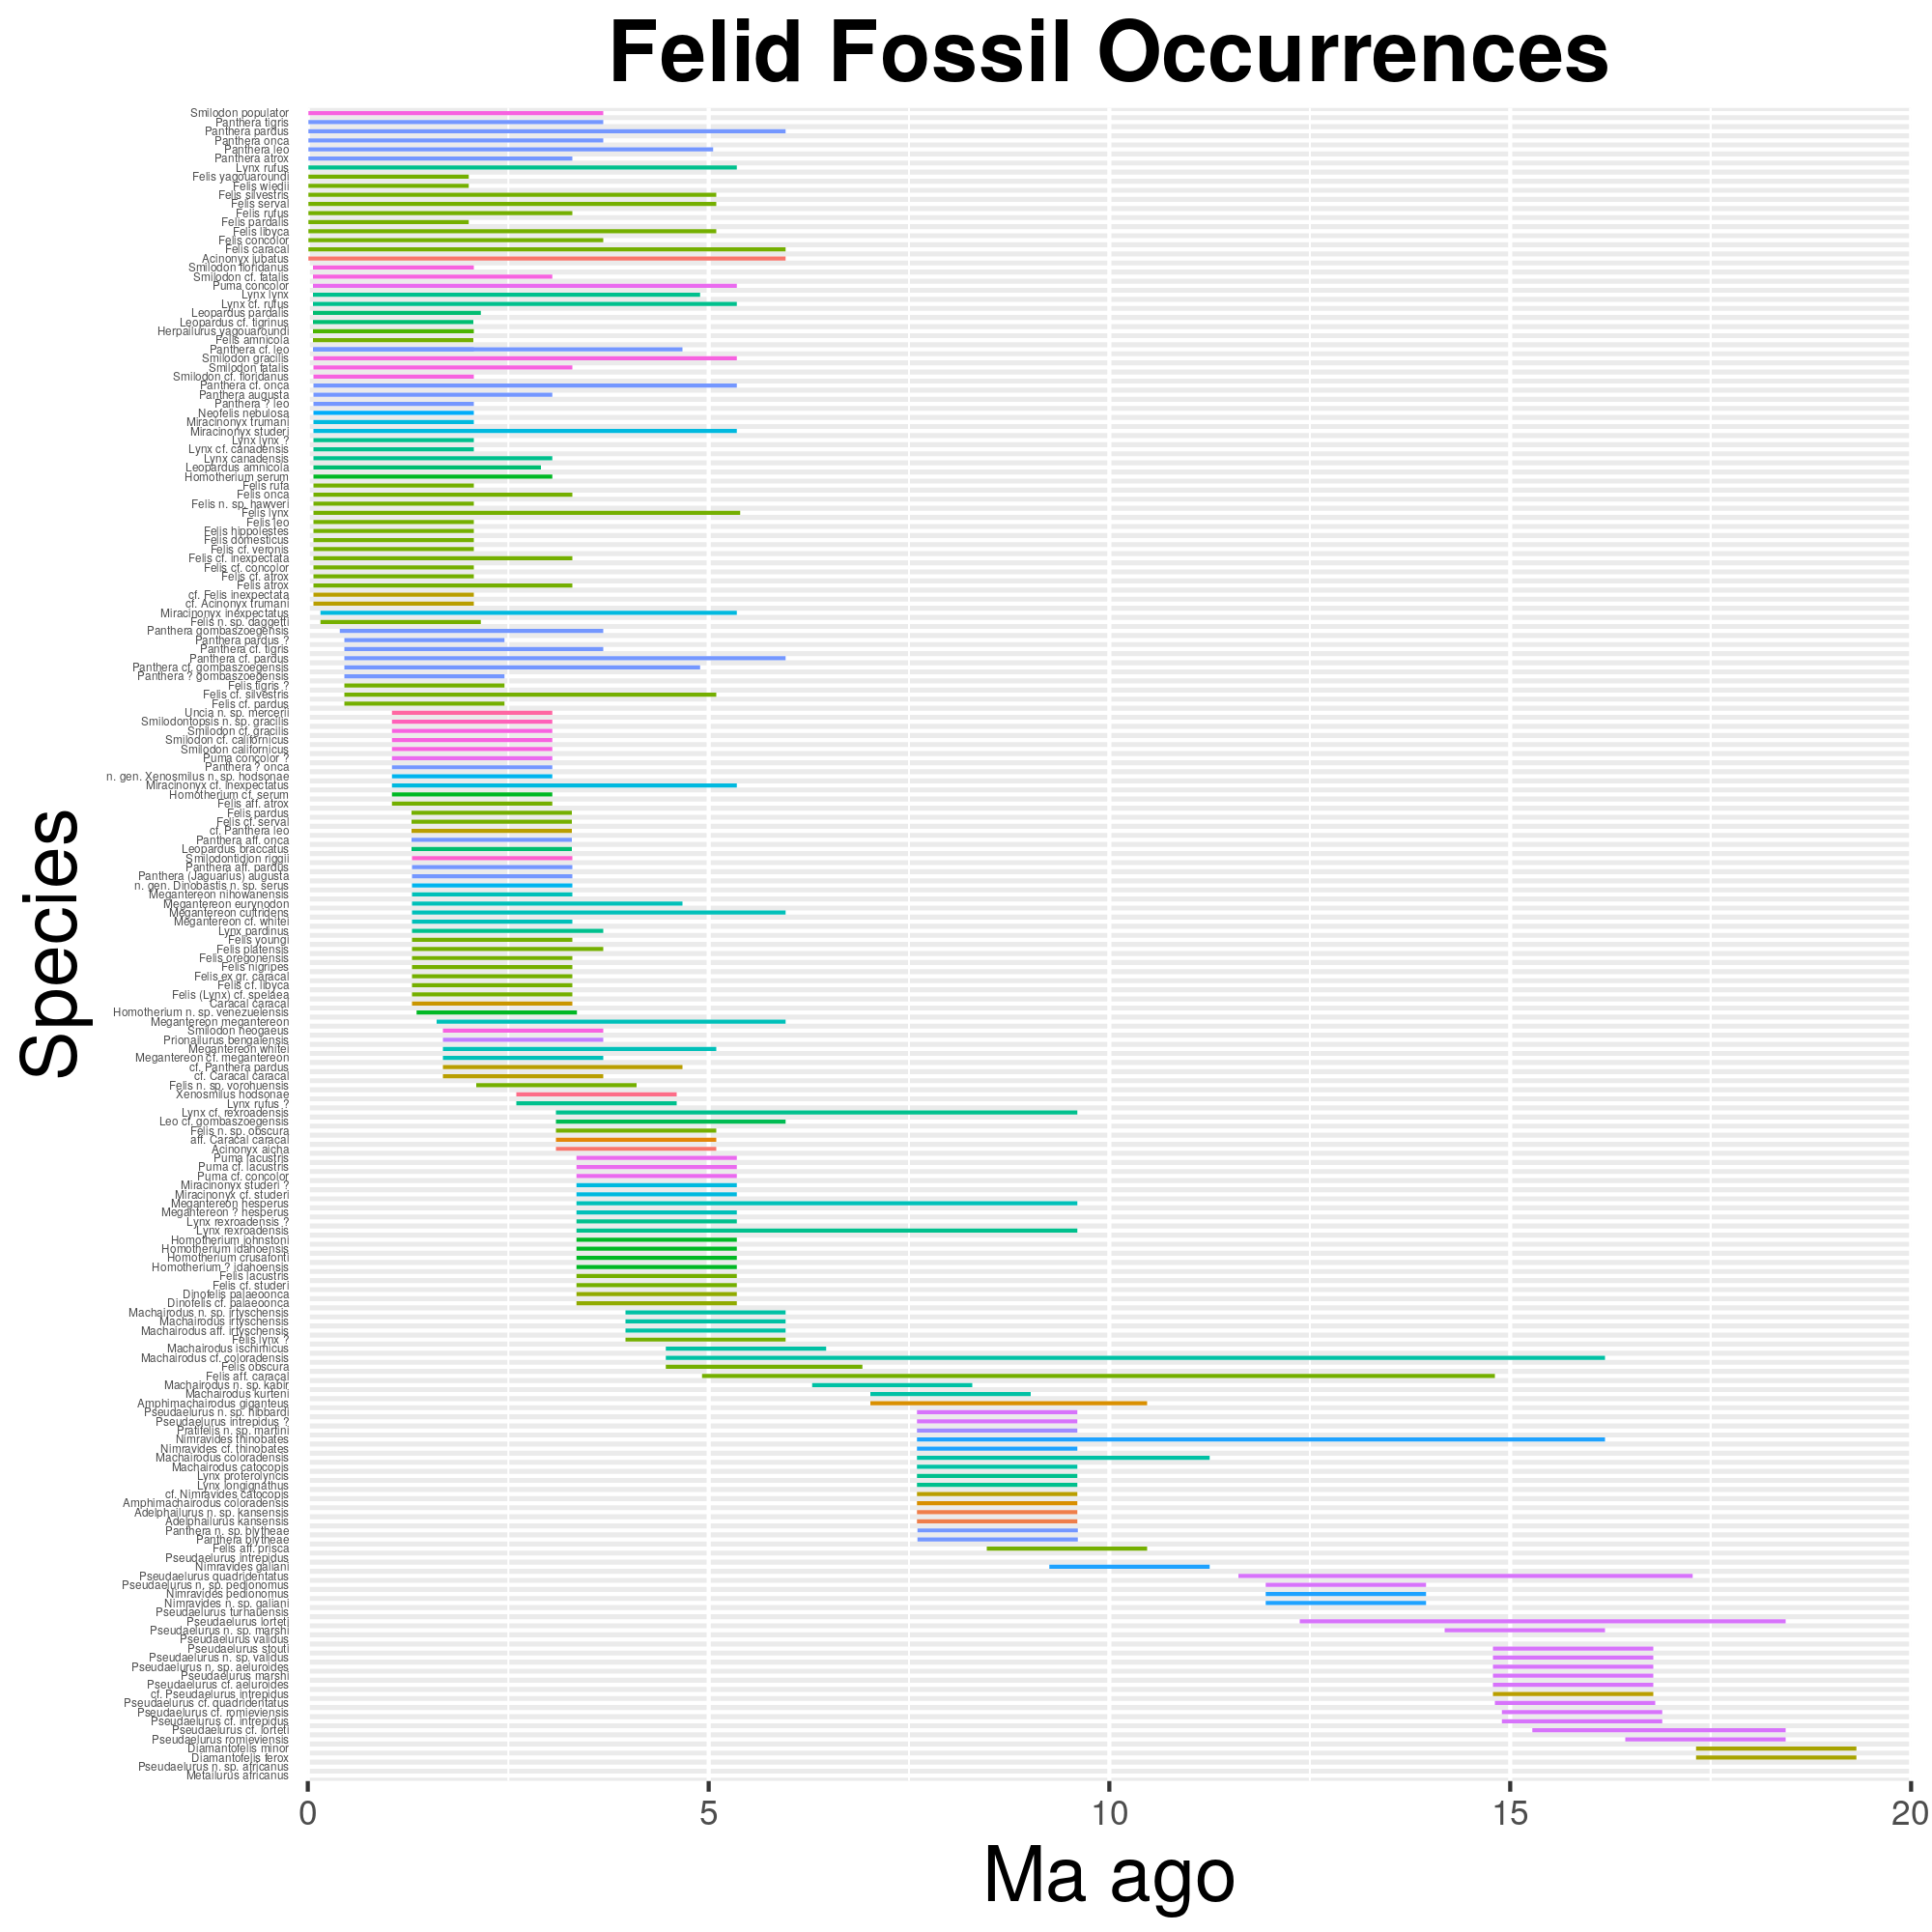

In [13]:
from IPython.display import Image
Image("output_png/felid_occ.png")

## Graphs from PyRate
**run UNIX script "PyRate/pyrate-run.sh"**

**new folder "pyrate_mcmc_logs/" will be created**

**run UNIX code from "pyrate_mcmc_logs/" : python ~/PyRate/PyRate.py -plot canid_occ_1_marginal_rates.log**

In [ ]:
from IPython.display import Image


![alt]("output_png/felid_occ.png")